# Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.


In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

%matplotlib inline

In [43]:
df_logins = pd.read_json('logins.json')

df_logins['counts'] = 1

df_logins.head()

,login_time,counts
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [44]:
# setting the index for the data
df_logins = df_logins.set_index('login_time')
  
# converting index to datetime index
df_logins.index = pd.to_datetime(df_logins.index)

In [45]:
df_logins.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   counts  93142 non-null  int64
dtypes: int64(1)
memory usage: 1.4 MB


In [54]:
# resample to every 15 and aggregate by the count
samples_15min = df_logins.resample('15T').agg({'counts': 'sum'})

## All Logins

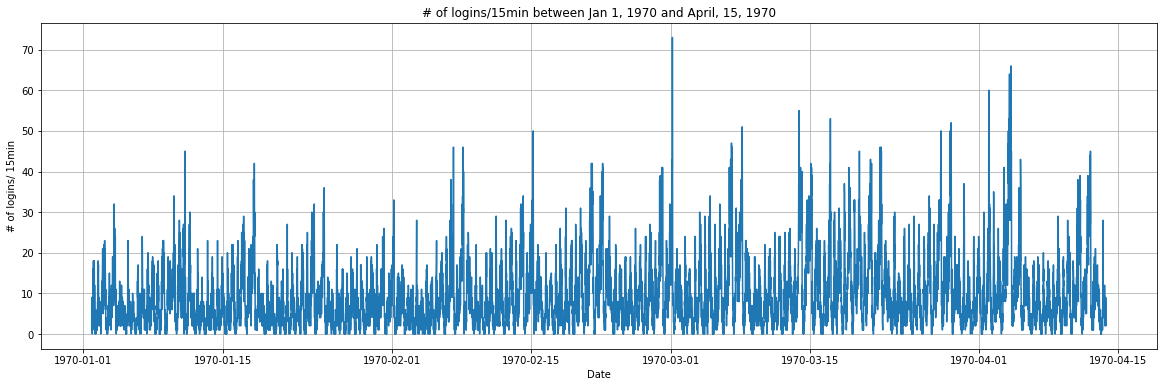

In [55]:
fig, ax = plt.subplots(figsize=(20, 6))

plt.plot(samples_15min)

ax.set_xlabel('Date')
ax.set_ylabel('# of logins/ 15min')
ax.set_title('# of logins/15min between Jan 1, 1970 and April, 15, 1970')
ax.grid(True)

## Logins Between Jan 1, 1970 and  Jan 31, 1970

There appears to be  ajor spikes in logins throughout january that are evenly spaced out, this means they are likely occuring during the same time of the week. 

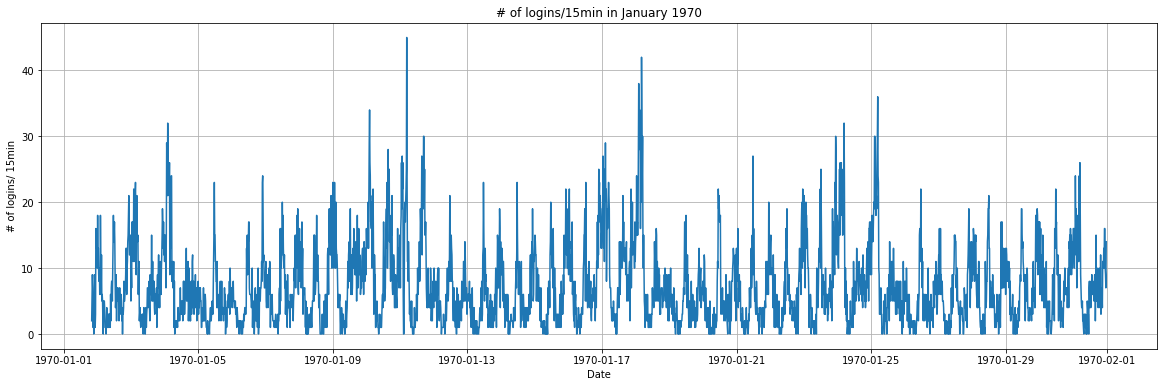

In [56]:
january_1970 = samples_15min['1970-01-01' :'1970-01-31']

fig, ax = plt.subplots(figsize=(20, 6))
ax.set_xlabel('Date')
ax.set_ylabel('# of logins/ 15min')
ax.set_title('# of logins/15min in January 1970')
ax.grid(True)

plt.plot(january_1970)

## Logins During a Week

Jan 5, 1970 is a monday I plotted 2 weeks to see is there is a pattern and there appears to be an increase in logins during the weekends and then a dropoff in logins starting monday.

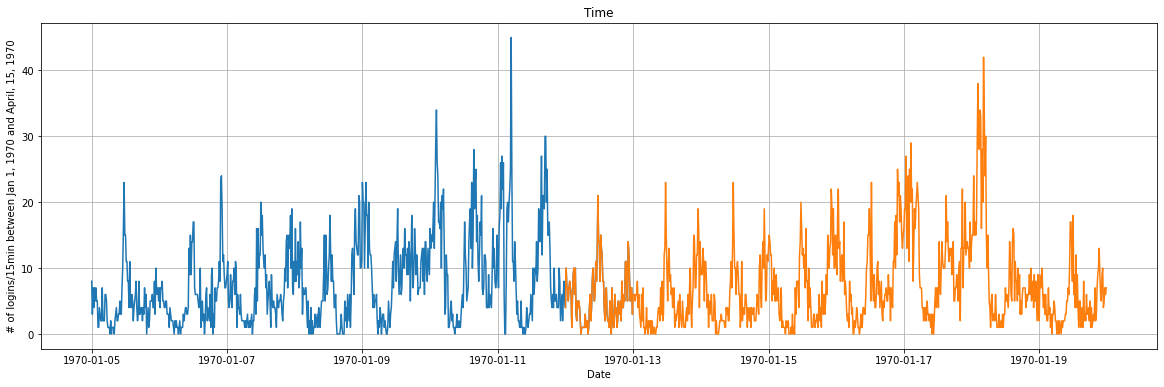

In [57]:
january_monday_to_friday1 = samples_15min['1970-01-05' :'1970-01-12']
january_monday_to_friday2 = samples_15min['1970-01-12' :'1970-01-19']

fig, ax = plt.subplots(figsize=(20, 6))
ax.set_xlabel('Date')
ax.set_ylabel('# of logins/15min between Jan 1, 1970 and April, 15, 1970')
ax.set_title('Time')
ax.grid(True)

plt.plot(january_monday_to_friday1)
plt.plot(january_monday_to_friday2)

## Logins During a Weekday

On weekdays there is a spike in logins around noon

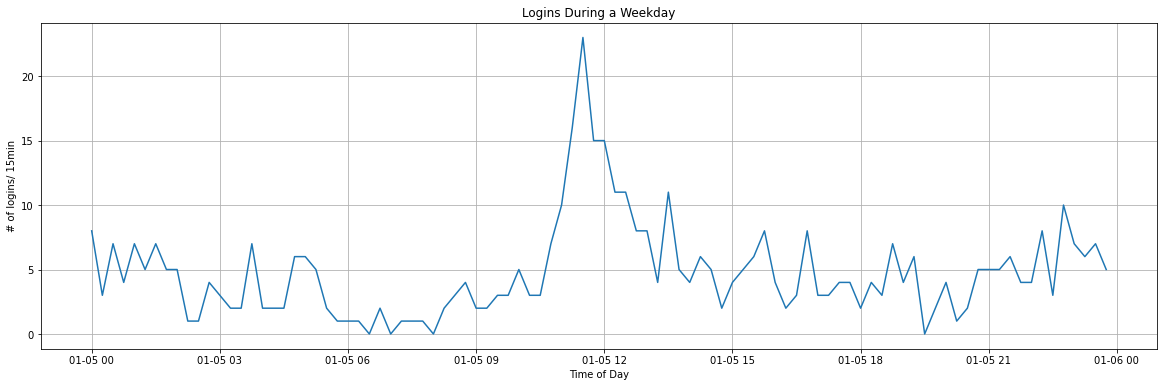

In [58]:
january_5th = samples_15min['1970-01-05' :'1970-01-05']

fig, ax = plt.subplots(figsize=(20, 6))
ax.set_xlabel('Time of Day')
ax.set_ylabel('# of logins/ 15min')
ax.set_title('Logins During a Weekday')
ax.grid(True)

plt.plot(january_5th)

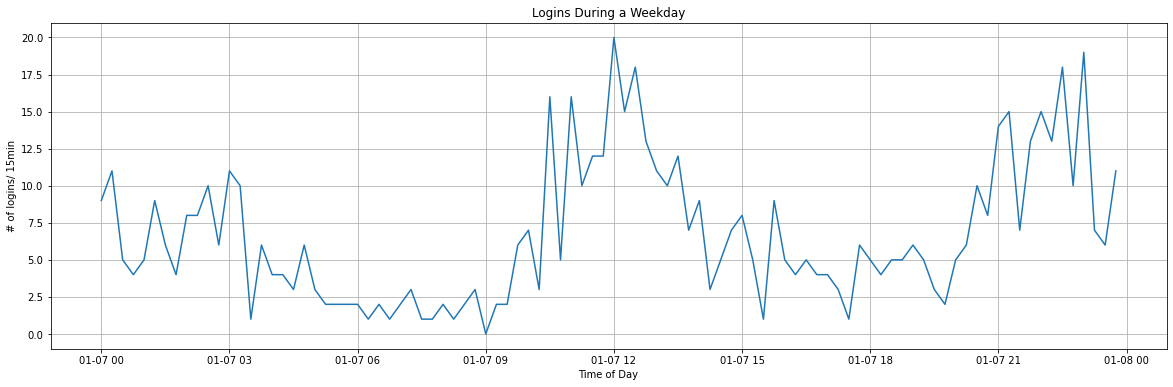

In [59]:
january_7th = samples_15min['1970-01-07' :'1970-01-07']

fig, ax = plt.subplots(figsize=(20, 6))
ax.set_xlabel('Time of Day')
ax.set_ylabel('# of logins/ 15min')
ax.set_title('Logins During a Weekday')
ax.grid(True)

plt.plot(january_7th)

## Logins During a weekend

Weekends also follow a pattern, Jan 10 and Jan 11 are both saturday and have similar highs and lows throughout the day.

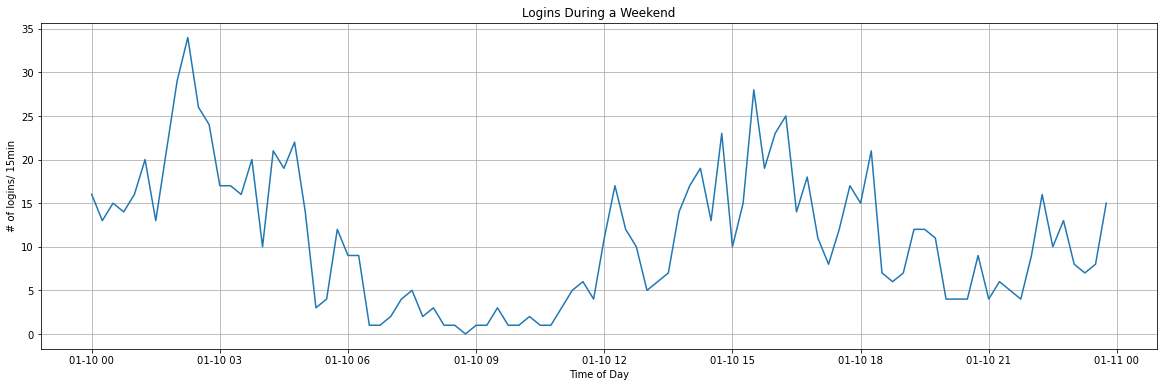

In [60]:
january_10th = samples_15min['1970-01-10' :'1970-01-10']

fig, ax = plt.subplots(figsize=(20, 6))
ax.set_xlabel('Time of Day')
ax.set_ylabel('# of logins/ 15min')
ax.set_title('Logins During a Weekend')
ax.grid(True)

plt.plot(january_10th)

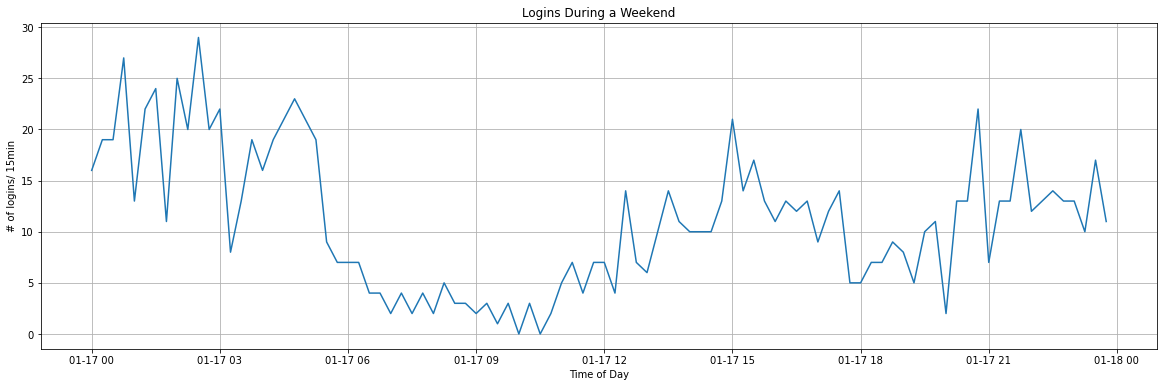

In [61]:
january_17th = samples_15min['1970-01-17' :'1970-01-17']

fig, ax = plt.subplots(figsize=(20, 6))
ax.set_xlabel('Time of Day')
ax.set_ylabel('# of logins/ 15min')
ax.set_title('Logins During a Weekend')
ax.grid(True)

plt.plot(january_17th)